## Задачи к главе 2

### 2.1

In [4]:
import numpy as np

def print_m_p25_p75(m, p25, p75):
    print('median = {0:.2f}, p25 = {1:.2f}, p75 = {2:.2f}'.format(m, p25, p75))

def get_m_p25_p75(vals, printing=False):
    m = np.median(vals)
    p25 = np.percentile(vals, 25)
    p75 = np.percentile(vals, 75)
    if printing:
        print_m_p25_p75(m, p25, p75)
    return (m, p25, p75)

def print_mean_std(m, std):
    print('mean = {0:.2f}, std = {1:.2f}'.format(m, std))

def get_mean_std(vals, printing=False):
    m, std = np.mean(vals), np.std(vals)
    if printing:
        print_mean_std(m, std)
    return (m, std)

vals = np.asarray([0,0,0,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,3,3,3,3,4,4,5,5,5,5,6,7,9,10,11], dtype=np.float)
get_m_p25_p75(vals, True)
_,_= get_mean_std(vals, True)

median = 2.00, p25 = 1.00, p75 = 5.00
mean = 3.09, std = 2.84


### 2.2

In [5]:
vals = np.asarray([289,203,359,243,232,210,251,246,224,239,220,211])
get_m_p25_p75(vals, True)
_,_= get_mean_std(vals, True)

median = 235.50, p25 = 217.75, p75 = 247.25
mean = 243.92, std = 41.21


### 2.3

In [6]:
vals = np.asarray([1.2,1.4,1.6,1.7,1.7,1.8,2.2,2.3,2.4,6.4,19.0,23.6])
get_m_p25_p75(vals, True)
_,_= get_mean_std(vals, True)

median = 2.00, p25 = 1.67, p75 = 3.40
mean = 5.44, std = 7.27


### 2.4

Распределение равномерное

In [7]:
vals = [1,2,3,4,5,6]
print('mean = {0:.2f}'.format(np.mean(vals)))

mean = 3.50


### 2.5

mean = 3.85, std = 1.15


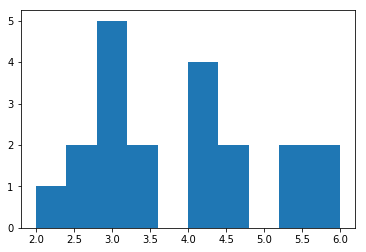

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(42)

count = 20

scores1, scores2 = np.random.randint(1,7, count), np.random.randint(1,7, count)
scores=np.array([scores1, scores2]).reshape((-1,2))
scores_means = np.mean(scores, axis=1)

plt.hist(scores_means)

_,_= get_mean_std(scores_means, True)

### 2.6

Допустим распределение числа авторов не зависит от года, т.е. мы имеем 4 выборки из одной генеральной совокупности, посмотрим как распределены средние этих выборок

mean = 3.00, std = 1.13


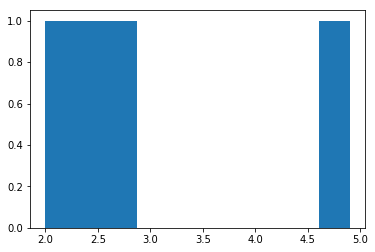

In [13]:
means = np.asarray([2.0, 2.3, 2.8, 4.9])
_ = plt.hist(means)

_,_= get_mean_std(means, True)

По 4 выборкам конечно сложно судить о характере распределения, в целом std не сильно большое для 4-х значений, т.е. std ген совокупности в таком случае должен быть примерно в 2 раза больше - т.е. около 2-х. Т.к. sqrt(4)=2

Попробуем зайти с другой стороны.
У статьи есть минимум 1 автор, следовательно минимальное значения для распределения это 1. От него до среднего значения, чтобы оно выглядело как нормальное должно быть 2 стандартных отклонения.
В первом случае и втором случаях от 1 до среднего меньше одного std.
Значит большинство значений лежит слева и далее вытянуто убывает вправо.
В третьем случае похоже на нормальное.
Четвёртый случай похож на первые 2.

К тому же средние данных выборок, хотя их всего 4, не образуют нормального распределения, а просто возрастают.

Попробуем сэмулировать эти 4 ситуации.

mean = 2.00, std = 1.40


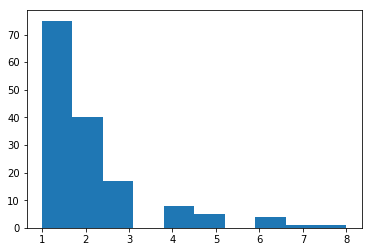

In [10]:
vals1 = np.concatenate([[1]*75, [2]*40, [3]*17, [4]*8, [5]*5, [6]*4, [7]*1, [8]*1])
_,_= get_mean_std(vals1, True)
len(vals1)

_ = plt.hist(vals1)

Первый случай показывает пример такого вида распределения.
Остальные 3 случая видимо похожи на него, просто возрастает доля статей с большим числом авторов
В четвёртом похоже на выброс, когда есть статья с аномально большим числом авторов:

mean = 4.90, std = 7.33


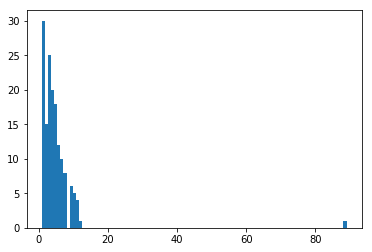

In [11]:
vals4 = np.concatenate([[1]*30, [2]*15, [3]*25, [4]*20,
                        [5]*18, [6]*12, [7]*10, [8]*8,
                       [9]*6, [10]*5, [11]*4, [12]*1,
                       [89]*1])
_,_= get_mean_std(vals4, True)
len(vals4)

_ = plt.hist(vals4, bins=100)

## Задачи к главе 3

Полезная ссылка для расчёта - http://statpages.info/anova1sm.html

Хотя в книге есть ответы

### 3.1

In [68]:
from scipy import stats
import math


def calc_tstd(means):
    m = np.mean(means)
    sq_sum = np.sum(np.square(np.full(len(means), m) - means)) / (len(means) - 1)
    return math.sqrt(sq_sum)

def calc_f(n, means, stds, se=False, printing=True):
    if se:
        sq_n = math.sqrt(n)
        stds = [v*sq_n for v in stds]
    within_d = np.mean(np.square(stds))
    mean_std = calc_tstd(means) # stats.tstd(means)
    inter_d = (mean_std**2)*n
    f = inter_d/within_d
    if printing:
        print('F = {0:.2f}, w_d = {1:.2f}, i_d = {2:.2f}, m_sd = {3:.2f}'.format(f, within_d, inter_d, mean_std))
    return f

# test with example of women sport and menstruation
calc_f(26, [11.5, 10.1, 9.1], [1.3, 2.1, 2.4])

# 2 groups and n=21, so inter df = 1 and inner df = 20*2 = 40
f = calc_f(21, [8.5, 13.9], [4.7, 4.1])

def print_f(f, dfn, dfd):
    f_005 = stats.f.ppf(q=1-0.05, dfn=dfn, dfd=dfd)
    f_001 = stats.f.ppf(q=1-0.01, dfn=dfn, dfd=dfd)
    print('F = {0:.2f}, F (0.05) = {1:.2f}, F (0.01) = {2:.2f}'.format(f, f_005, f_001))
    
print_f(f, 1, 40)

F = 9.56, w_d = 3.95, i_d = 37.79, m_sd = 1.21
F = 15.74, w_d = 19.45, i_d = 306.18, m_sd = 3.82
F = 15.74, F (0.05) = 4.08, F (0.01) = 7.31


Видим, что F больше чем критического значение при уровне значимости 0.01, поэтому отклоняем нулевую гипотезу и считаем что получили статичтически значимое отличие между данными группами

### 3.2

In [58]:
f = calc_f(200, [3.17, 2.72, 2.63, 2.29, 2.12], [0.74, 0.71, 0.73, 0.70, 0.72])
print_f(f, 5-1, 199*5)

F = 64.18, w_d = 0.52, i_d = 33.29, m_sd = 0.41
F = 64.18, F (0.05) = 2.38, F (0.01) = 3.34


По данным видно, что высока вероятность, что результат в группах отличается

### 3.3

In [59]:
f = calc_f(70, [43.3, 58.0, 64.8], [14.2, 17.7, 14.3])
print_f(f, 3-1, 69*3)

F = 35.25, w_d = 239.81, i_d = 8453.43, m_sd = 10.99
F = 35.25, F (0.05) = 3.04, F (0.01) = 4.71


Есть статистическая значимость различий между группами

### 3.4

In [69]:
f = calc_f(36, [85.1, 83.5, 80.9, 72.6, 60, 73.5, 63.8], [0.3, 1.0, 0.6, 0.7, 1.3, 0.7, 2.6], se=True)
print_f(f, 7-1, 35*7)

F = 60.38, w_d = 55.95, i_d = 3378.24, m_sd = 9.69
F = 60.38, F (0.05) = 2.14, F (0.01) = 2.88


Есть статистическая значимость различий между группами

### 3.5

In [70]:
f = calc_f(36, [51.4, 59.4], [3.2, 3.9], se=True)
print_f(f, 2-1, 35*2)

F = 2.51, w_d = 458.10, i_d = 1152.00, m_sd = 5.66
F = 2.51, F (0.05) = 3.98, F (0.01) = 7.01


Различия между группами НЕ являются статистически значимыми

### 3.6

In [43]:
f = calc_f(16, [49.9, 51.2, 57.3, 46.4, 43.9, 65.2], [14.3, 13.4, 14.9, 14.7, 16.5, 20.5])
print_f(f, 6-1, 15*6)

F = 3.85, w_d = 252.44, i_d = 971.99, m_sd = 7.79
F = 3.85, F (0.05) = 2.32, F (0.01) = 3.23


Различия между группами являются статистически значимыми

### 3.7

In [80]:
def calc_f_n(nums, means, stds, se=True, pr=True):
    if se:
        stds = [s*math.sqrt(ni) for ni,s in zip(nums, stds)]
    n = np.sum(nums)
    k = len(nums)
    s_in = np.sum([(ni-1)*(s**2) for ni, s in zip(nums, stds)])
    v_in = n - k
    s_out = np.sum([ni*(m**2) for ni, m in zip(nums, means)]) - (np.sum([ni*m for ni, m in zip(nums, means)]))**2 / n
    v_out = k - 1
    f = (s_out / v_out) / (s_in / v_in)
    if pr:
        print('F = {0:.2f}'.format(f))
    return f
nums = [30, 13, 20, 20]
f = calc_f_n(nums, [15, 15, 9, 7], [1, 2, 2 , 1])
print_f(f, len(nums)-1, np.sum(nums)-len(nums))

F = 8.19
F = 8.19, F (0.05) = 2.72, F (0.01) = 4.04


Различия между группами являются статистически значимыми

### 3.8 

In [81]:
nums = [15, 37, 31, 13, 10]
f = calc_f_n(nums, [257, 196, 221, 280, 310], [159, 359, 340, 263, 95], se=False)
print_f(f, len(nums)-1, np.sum(nums)-len(nums))

F = 0.41
F = 0.41, F (0.05) = 2.46, F (0.01) = 3.51


Различия между группами НЕ являются статистически значимыми